In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

In [3]:
load_dotenv()  # take environment variables from .env file
model = ChatOpenAI(model="gpt-4o-mini")

In [4]:
# define state
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [5]:
def create_outline(state: BlogState) -> BlogState:
    title = state['title']
    prompt = f"Generate a detailed outline for a blog post titled '{title}'."
    response = model.invoke(prompt).content
    state['outline'] = response
    return state

In [6]:
def write_content(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f"Write a comprehensive blog post titled '{title}' based on the following outline:\n{outline}"
    response = model.invoke(prompt).content
    state['content'] = response
    return state

In [7]:
# define graph
graph = StateGraph(BlogState)

# nodes
graph.add_node("create_outline", create_outline)
graph.add_node("write_content", write_content)

# edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "write_content")
graph.add_edge("write_content", END)

# compile the graph
workflow = graph.compile()

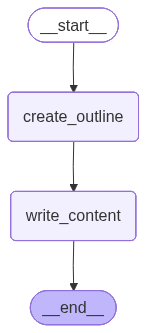

In [8]:
# Visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [9]:
initial_state = BlogState(title="The Future of AI in Healthcare", outline="", content="")
final_state = workflow.invoke(initial_state)

In [ ]:
print(final_state['outline'])


**Blog Post Title: The Future of AI in Healthcare**

**Outline:**

**I. Introduction**
   - A. Definition of AI and its relevance to healthcare
   - B. Brief overview of AI's current role in healthcare
   - C. Importance of exploring the future of AI in this sector
   - D. Aims of the post: to discuss potential advancements and implications

**II. Current State of AI in Healthcare**
   - A. Overview of existing AI technologies in healthcare
       1. Diagnostic tools (e.g., imaging analysis)
       2. Predictive analytics
       3. Treatment personalization
       4. Virtual health assistants
   - B. Case studies demonstrating current AI applications
       1. Radiology: Automated detection of anomalies
       2. Oncology: AI-driven treatment recommendations
       3. Patient engagement: Chatbots and telemedicine
   - C. Benefits realized so far
       1. Improved accuracy and speed of diagnoses
       2. Enhanced patient outcomes
       3. Cost reduction in healthcare management

**II

In [11]:
print(final_state['content'])

# The Future of AI in Healthcare

## I. Introduction

Artificial Intelligence (AI) is transforming various sectors, and healthcare is at the forefront of this technological revolution. Defined broadly, AI refers to the simulation of human intelligence processes by machines, particularly computer systems. In healthcare, it encompasses a variety of technologies, from machine learning algorithms that can identify patterns in vast datasets to robotic systems assisting in surgical procedures.

As of now, AI is not just an abstract concept but a burgeoning reality in healthcare settings across the globe. It plays a critical role in diagnostics, treatment, patient engagement, and operational efficiency. However, exploring the future of AI in healthcare is essential, as it stands poised to redefine the very essence of patient care. This post aims to discuss potential advancements and implications regarding AI's integration into healthcare.

## II. Current State of AI in Healthcare

### A. Over